# Optimization (tutorial)

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



To find the optimal production level of the firm, we will first write the indirect demand by inverting $x(p)$.
This yields


$$
x(p) = q = 2e^{-0.5p} \implies p = \frac{\ln(\frac{q}{2})}{-0,5}
$$
$$
\implies P(q) = 2(\ln(2) - \ln(q))
$$

Then the profit function that the firms wants to maximize is 

$$
\begin{align}
\Pi(q) &= qP(q) - C(q) \\
&= 2q(\ln(2) - \ln(q)) - 0.5 - q(1-qe^{-q})
\end{align}
$$

In [128]:
function profit(q)

    return 2q*(log(2)-log(q)) - 0.5 -q*(1-q*exp(-q))
    
end

profit (generic function with 1 method)

In [129]:
import Pkg
Pkg.add("Plots")
using Plots

  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
 [no changes]


In [130]:
x = [i for i in range(0.01,stop = 4, step = 0.001)];

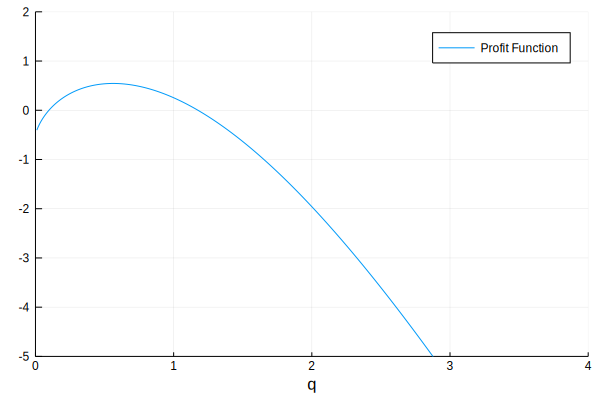

In [131]:
plot(x, profit.(x), xlabel = "q",label="Profit Function", xlims = (0,4),ylims = (-5,2))

We can see that the profit function is concave, so that a first order condition will indeed yield the maximum. This gives

$$
\begin{align}
\frac{\partial\Pi(q)}{\partial q} = 0 &\implies 2\ln(2) - (2\ln(q)+2)-1+2qe^{-q} + q^2(-e^{-q}) = 0\\
&\implies 2\ln(2)-3-2\ln(q) + 2qe^{-q}-q^2e^{-q} = 0 \\
&\implies f(q) =0
\end{align}
$$

where $f(q) = 2\ln(2)-3-2\ln(q) + 2qe^{-q}-q^2e^{-q}$. This is a one dimensional root-finding problem, that we can solve using Newton's method.

In [272]:
function Newton(η, ϵ, f,df,x0)
    
    xn = x0
    i= 0
    while abs(f(xn)) > ϵ
        i+=1
        xn1 = xn - f(xn)/df(xn)
        if abs(xn1 - xn)< η
            println("Eta criterion stopped")
            return xn
        else
            xn = xn1 
        end
    end
    println("Epsilon criterion stopped")
    return xn
end

Newton (generic function with 1 method)

In [133]:
function test(x)
   return 3x^2 -8x + 2 
end

function dtest(x)
    return 6x - 8
end

Newton(0.01, 0.01,test,dtest,3)

1
2
3
Eta criterion stopped


2.392857142857143

We define the derivative of the profit function

In [134]:
function dprofit(q)
return 2log(2) - 3 - 2log(q) + 2q*exp(-q) - q^2*exp(-q)   
end

function d2profit(q)
return -2/q + 2exp(-q) - 4q*exp(-q) + q^2*exp(-q) 
end

d2profit (generic function with 1 method)

In [135]:
qstar = Newton(0.00001, 0.00001, dprofit, d2profit, 1)
println("The optimal quantity to produce is q = $(qstar)")

1
2
3
4
Epsilon criterion stopped
The optimal quantity to produce is q = 0.5618593673394517


---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in (0,1)$. Its law of motion is $k_{t+1}=k_{t}(1-\delta)+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) =  k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1)$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1)$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

From the literature, we can calibrate the parameters as follows: 
$$
\begin{cases}
\beta = 0.3\\
\delta = 0.06\\
g = 0.01\\
\end{cases}
$$

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

Writing $\hat{y}_t= \frac{y_t}{n_t}$ yields the following per capita equations:
$$
\hat{y}_t = \frac{A k_t^{\alpha} n_t^{1-\alpha}}{n_t} = A\left(\frac{k_t}{n_t}\right)^{\alpha} = A\hat{k}_t^{\alpha}
$$


$$
\hat{k}_{t+1}= \frac{k_{t+1}}{n_{t+1}}= \frac{k_{t}(1-\delta)+i_{t}}{gn_t} = \hat{k}_t\frac{(1-\delta)}{g} + \frac{s}{g}\hat{y}_t = \hat{k}_t\frac{(1-\delta)}{g} + \frac{s}{g}A\hat{k}_t^{\alpha}
$$

Finally

$$
\hat{c}_t = \frac{y_t(1-s)}{n_t} = \hat{y}_t(1-s)
$$

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [257]:
function f(k::Float64, p::Dict{Symbol,Float64})
    δ = p[:δ]
    α = p[:α]
    s = p[:s]
    A = p[:A]
    g = p[:g]
    return k*(1-δ)/g + s/g*A*k^α
end



f (generic function with 2 methods)

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [258]:
function iterates(k0::Float64, T::Int64,p::Dict{Symbol,Float64} )
    values = [0.0 for i in 1:T]
    values[1] = k0
    for t in 2:T
        k1 = f2(k0,p)
        values[t] = k1
        k0 = k1
    end
    return values  
end

iterates (generic function with 1 method)

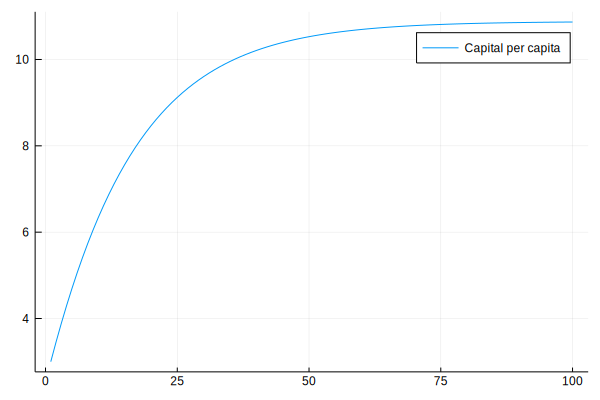

In [261]:
p = Dict(:δ=>0.06, :α =>0.1, :s =>0.2, :A =>3.0, :g => 1.01)
T = 100
k0= 3.0
values =iterates(k0,T,p)
t = [i for i in 1:T]
plot(t, values, label="Capital per capita")

In [263]:
δ = p[:δ]
α = p[:α]
s = p[:s]
A = p[:A]
g = p[:g]
tkstar = (A*s/(δ+g-1))^(1/(1-α))
akstar = last(values)


println(" The approximated steady-state level of capital per capita is: $akstar")
println("The theoretical steady-state level of capital per capita is: $tkstar")

 The approximated steady-state level of capital per capita is: 10.868245318157713
The theoretical steady-state level of capital per capita is: 10.882427669908504


__What factors affect the steady-state level of capital?__

If we compute the theoretical steady-state of capital, we get that

$$
\begin{align}
&\hat{k}_{t+1} = \hat{k}_t\\\\
&\hat{k}_t\frac{1-\delta}{g} + \frac{s}{g}A\hat{k}_t^{\alpha} = \hat{k}_t\\\\
&\frac{1-\delta}{g}  + \frac{s}{g}A\hat{k}_t^{\alpha-1} = 1\\\\
&\hat{k}_t^{\star} = \left(\frac{g + \delta -1}{sA} \right)^{\frac{1}{\alpha -1}}\\\\
&\hat{k}_t^{\star} = \left(\frac{sA}{g + \delta -1} \right)^{\frac{1}{1-\alpha}}
\end{align}
$$

Where we assumed that $\hat{k}_t \neq 0$ in the third line. A zero-capital steady state would happen if $s=0$, but we don't study this case here.

Hence the steady-state level of capital positively depends on the level of technology (A), the fraction of income invested (s). It however negatively depends on the depreciation rate ($\delta$) and on the growth rate of the population (g). The following graph illustrates this fact.

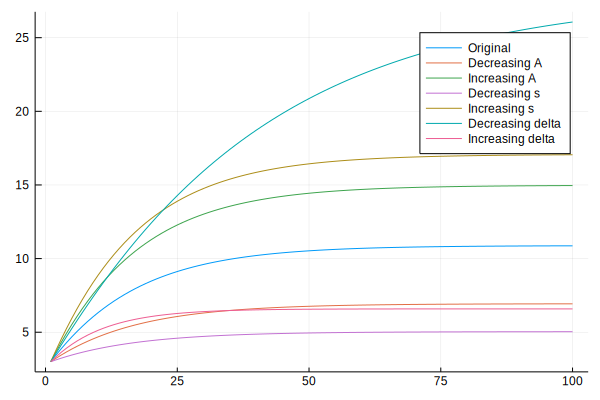

In [265]:
pl = plot(t, values, label="Original")


p2 = Dict(:δ=>0.06, :α =>0.1, :s =>0.2, :A =>2.0, :g => 1.01)
values2 = iterates(k0,T,p2)

p3 = Dict(:δ=>0.06, :α =>0.1, :s =>0.2, :A =>4.0, :g => 1.01)
values3 = iterates(k0,T,p3)

p4 = Dict(:δ=>0.06, :α =>0.1, :s =>0.1, :A =>3.0, :g => 1.01)
values4 = iterates(k0,T,p4)

p5 = Dict(:δ=>0.06, :α =>0.1, :s =>0.3, :A =>3.0, :g => 1.01)
values5 = iterates(k0,T,p5)

p6 = Dict(:δ=>0.02, :α =>0.1, :s =>0.2, :A =>3.0, :g => 1.01)
values6 = iterates(k0,T,p6)

p7 = Dict(:δ=>0.1, :α =>0.1, :s =>0.2, :A =>3.0, :g => 1.01)
values7 = iterates(k0,T,p7)


plot!(pl,t, values2, label="Decreasing A")
plot!(pl,t, values3, label="Increasing A")
plot!(pl,t, values4, label="Decreasing s")
plot!(pl,t, values5, label="Increasing s")
plot!(pl,t, values6, label="Decreasing delta")
plot!(pl,t, values7, label="Increasing delta")

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

__Compute the steady-state directly using a Newton method and compare convergence speed.__

From the computations before, finding the steady-state value of capital, amounts to finding the root(s) of 

$$
h(\hat{k}_t) = \hat{k}_{t+1} - \hat{k}_t  = \hat{k}_t\frac{1-\delta}{g} + \frac{s}{g}A\hat{k}_t^{\alpha} - \hat{k}_t
$$

The first derivative is:

$$
dh({\hat{k}_t}) = \frac{1-\delta}{g} + \frac{s}{g}A\alpha\hat{k}_t^{\alpha-1}-1
$$

We solve for the roots using the Newton method implemented above.

In [293]:
function h(k;δ=0.06, g = 0.01, A= 3.0,α = 0.1, s = 0.2)
    return s*A*k^α - k*(g + δ)
end

function dh(k;δ=0.06, g = 0.01, A= 3.0,α = 0.1, s = 0.2)
    return  s*A*α*k^(α-1) - g- δ
end


function h2(k;δ=0.06, g = 1.01, A= 3.0,α = 0.1, s = 0.2)
    return s/g*A*k^α - k*(1 - δ)/g - k
end

function dh2(k;δ=0.06, g = 1.01, A= 3.0,α = 0.1, s = 0.2)
    return  (1-δ-g)/g + (s/g)*A*α*k^(α-1)
end

dh2 (generic function with 1 method)

In [294]:
kstar = Newton(0.00001, 0.00001,h,dh,k0)

Epsilon criterion stopped


10.882428285070818

The result is coherent with the previous approximation, and even closer to the theoretical value.

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

Steady-state consumption is given by 
$$
\hat{c}_t^{\star} = \hat{y}_t^{\star}(1-s) = A\left(\hat{k}_t^{\star}\right)^{\alpha}(1-s) = A\left(\frac{sA}{g + \delta-1} \right)^{\frac{\alpha}{1-\alpha}}(1-s) = A^{\frac{1}{1-\alpha}}\left(\frac{s}{g + \delta-1 } \right)^{\frac{\alpha}{1-\alpha}}(1-s)
$$

We find the maximum w.r.t. $s$ using optimze.jl.

In [312]:
δ=0.06
g = 1.01
A= 3.0
α = 0.1
s = 0.2

function consumption(s)
    return -A^(1/(1-α))*(s[1]/(g+δ-1))^(α/(1-α))*(1-s[1])
end

s0 = [0.1]
optimize(consumption,s0)

ErrorException: You cannot use NelderMead for univariate problems. Alternatively, use either interval bound univariate optimization, or another method such as BFGS or Newton.

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__



---

## Exercise: constrained optimization

Consider the function $l(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [161]:
Pkg.add("Optim")
using Optim

  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
 [no changes]


In [173]:
function l(x)
   return  1 - (x[1]-0.5)^2 - (x[2]-0.3)^2
end


l (generic function with 1 method)

In [172]:
x0 = [0.1,0.5]
optimize(l,x0)

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Minimizer: [-4.53e+153, 1.40e+154]
    Minimum:   -Inf

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.00e-01, 5.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2640


The optimizer tells us that the function seems to diverge to $+\infty$: no minimizer could be found and the maximum number of iterations was reached.

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

We will mcpsolve and therefore compute the gradient of the function.

In [296]:
function g!(G, x)
G[1] = 2.0 * x[1] - 1
G[2] = 2.0 * x[2] - 0.6
end

g! (generic function with 1 method)

In [297]:
mcpsolve(g!, [-Inf, -Inf], [0.3, Inf], [ 0., 0.])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.3000000000003685, 0.3]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

The minimization problem can be reformulated as a root finding problem using the Karush-Kuhn-Tucker theorem:


\begin{cases}
\nabla (f + \mu (x-0.3)) = 0 \\
\mu(x-0.3) = 0 \\
\end{cases}

\begin{cases}
-2x + 1 + \mu = 0 \\
-2y + 0.6 = 0\\
\mu(x-0.3) = 0 \\
\end{cases}

The sign of before the Lagrangian will change when passing to maximization.

__Solve using NLSolve.jl__

In [183]:
Pkg.add("NLsolve")
using NLsolve

  Resolving package versions...
  Installed NLsolve ─ v4.3.0
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
  [2774e3e8] + NLsolve v4.3.0
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
  [2774e3e8] + NLsolve v4.3.0
┌ Info: Precompiling NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1260


In [302]:
function L(G, x)
    G[1] =-2*x[1]+1- x[3]
    G[2] =-2*x[2]+0.6
    G[3] = x[3]*(x[1]- 0.3)
end 

mcpsolve(L, [-Inf, -Inf, 0.], [Inf, Inf, Inf], [ 0., 0., 0.1])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.1]
 * Zero: [0.29999999983209774, 0.3, 0.40000000033580446]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

We assume $\beta_1 \neq 0$, $\beta_2 \neq 0$ otherwise the problem is trivial as $U \equiv 0$.

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

The necessary KKT conditions for solving the problem are:

- $\frac{\partial U}{\partial c_1} - \lambda p_1 = 0$


- $\frac{\partial U}{\partial c_2}- \lambda p_2 = 0$


- $\lambda(p_1 c_1 + p_2 c_2 -I) = 0$

Where lambda is the multiplier of the inequality condition. 

__Verify the KKT conditions are sufficient for optimality.__

Since it is easy to find a Slater point, the KKT conditions are sufficient for optimality.

__Derive analytically the demand functions, and the shadow price.__

We solve the KKT system of equations:
$$
\begin{cases}
\frac{\partial U}{\partial c_1} - \lambda p_1 = 0\\\\
\frac{\partial U}{\partial c_2}- \lambda p_2 = 0\\\\
\lambda(p_1 c_1 + p_2 c_2 -I) = 0
\end{cases}
\implies
\begin{cases}
\frac{\beta_1}{c_1 - \gamma_1} - \lambda p_1 = 0\\\\
\frac{\beta_2}{c_2 - \gamma_2}- \lambda p_2 = 0\\\\
\lambda(p_1 c_1 + p_2 c_2 -I) = 0
\end{cases}
$$


From the last equation we deduce that either the constraint is binding or $\lambda = 0$. However, this latter would imply that $\beta_1 = \beta_2 = 0$ form the two first equations, which we assumed not to be the case (otherwise $U\equiv 0$ and the probem is not of great interest).

Therefore we assume $\lambda \neq 0$ and therefore $p_1 c_1 + p_2 c_2 = I \implies c_1 = \frac{I-p_2c_2}{p_1}$.

Then, from the first line we also get that $\lambda = \frac{\beta_1}{p_1(c_1 - \gamma_1)} = \frac{\beta_1}{I-p_2c_2 - p_1\gamma_1} $

Replacing the value of $\lambda$ in the second equation gives us

$$
\begin{align}
\frac{\beta_2}{c_2 - \gamma_2} = \frac{p_2\beta_1}{I-p_2c_2 - p_1\gamma_1}
&\implies (c_2 - \gamma_2)p_2\beta_1 = \beta_2(I-p_2c_2 - p_1\gamma_1)\\\\
&\implies c_2(p_2\beta_1 + \beta_2p_2) =\beta_2(I- p_1\gamma_1) + \gamma_2 p_2\beta_1\\\\
&\implies c_2^{\star} =\frac{\beta_2(I- p_1\gamma_1) + \gamma_2 p_2\beta_1}{p_2\beta_1 + \beta_2p_2}
\end{align}
$$

Then, $c_1^{\star}$ is given by

$$
c_1^{\star} = \frac{I-p_2c_2^{\star}}{p_1} = \frac{I - \frac{\beta_2(I- p_1\gamma_1) + \gamma_2 p_2\beta_1}{\beta_1 + \beta_2}}{p_1} = \frac{\beta_1(I- p_2\gamma_2) + \gamma_1 p_1\beta_2}{p_1\beta_2 + \beta_1p_1}
$$

It follows that the shadow price is given by 

$$
\lambda^*= \frac{\beta_1}{I-\frac{\beta_2(I- p_1\gamma_1) + \gamma_2 p_2\beta_1}{\beta_1 + \beta_2} - p_1\gamma_1}
= \frac{\beta_1(\beta_1 + \beta_2)}{\beta_1(I - \gamma_2p_2 + p_1\gamma_1)} = \frac{\beta_1 + \beta_2}{I -\gamma_2p_2 + p_1\gamma_1}
$$

__Interpret this problem as a complementarity problem and solve it using NLSolve.__

In [306]:
I= 30.0
p1 =2.0
p2 =3.0
γ1 =0.2
γ2 = 0.3
β1 = 0.3
β2 = 0.4

function L2(G, x)
    G[1] = β1/(x[1]-γ1) - x[3]p1
    G[2] = β2/(x[2]-γ2) - x[3]p2
    G[3] = x[3]*(p1*x[1] + p2*x[2]- I)
end 

mcpsolve(L, [0, 0, 0.], [Inf, Inf, Inf], [ 0.1, 0.1, 0.1])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 0.1, 0.1]
 * Zero: [-3.3717585655749973e-10, -8.531595433841329e-9, 7.99766599192224e-9]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__



To get the iso-utility curves, we will express $c_2$ as a function of $c_1$ once we fix $U = u$. This yields

$$
\begin{align}
u = \beta_1\ln(c_1 - \gamma_1) + \beta_2\ln(c_2 - \gamma_2) &\implies u = \ln\left((c_1-\gamma_1)^{\beta_1}(c_2-\gamma_2)^{\beta_2}\right)\\\\
&\implies exp(u) = (c_1-\gamma_1)^{\beta_1}(c_2-\gamma_2)^{\beta_2}\\\\
&\implies c_2 = \left[\frac{exp(u)}{(c_1 - \gamma_1)^{\beta_1}} \right]^{\frac{1}{\beta_2}} + \gamma_2
\end{align}
$$

Moreoever, to show the budget constraint, we will plot the following curve:

$$
c_2 = \frac{I - p_1c_1}{p_2}
$$

In [187]:
function optimal_choice(v)
    β1 = v[:β1]
    β2 = v[:β2]
    γ1 = v[:γ1]
    γ2 = v[:γ2]
    I  = v[:I]
    p1 = v[:p1]
    p2 = v[:p2]
    
    c1 = (β1*(I-p2*γ2) + γ1*p1*β2)/(p1*β2 + β1*p1)
    c2 = (β2*(I-p1*γ1) + γ2*p2*β1)/(p2*β1 + β2*p2)
   return [c1,c2]
end

function isoutility(c1,u,v::Dict{Symbol,Float64})
    β1 = v[:β1]
    β2 = v[:β2]
    γ1 = v[:γ1]
    γ2 = v[:γ2]
  return (exp(u)/(c1-γ1)^(β1))^(1/β2) + γ2
end

function budget(c1,v::Dict{Symbol,Float64})
    return (v[:I] - v[:p1]*c1)/v[:p2]
end


budget (generic function with 1 method)

In [248]:
c1 = [i for i in range(0.2,stop = 20, step = 0.1)];
v = Dict(:I=>30.0, :p1 =>2.0, :p2 =>3.0, :γ1 =>0.2, :γ2 => 0.3, :β1 => 0.3, :β2 => 0.4)
B = [budget(c,v) for c in c1]
Iso1 = [isoutility(c,1.15,v) for c in c1]
Iso2 = [isoutility(c,1,v) for c in c1]
Iso3 = [isoutility(c,1.226,v) for c in c1]
(c1star,c2star) = optimal_choice(v)

2-element Array{Float64,1}:
 6.3500000000000005
 5.766666666666667

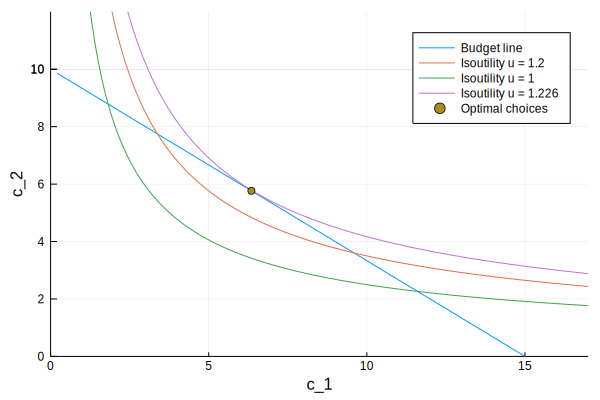

In [251]:
pl = plot(c1,B, label="Budget line",ylims = (0,12),xlims = (0,17),xlabel="c_1", ylabel = "c_2")
plot!(pl, c1, Iso1,  label="Isoutility u = 1.2")
plot!(pl, c1, Iso2, label="Isoutility u = 1")
plot!(pl, c1, Iso3, label="Isoutility u = 1.226")
scatter!(pl,[c1star], [c2star], label="Optimal choices")